In [2]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import requests

In [3]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


In [4]:
# import the necessary libraries 
from bs4 import BeautifulSoup
from sys import argv
from urllib.request import urlopen
from urllib.error import HTTPError

In [5]:
# your code here
#Download the webpage of the "Top 100 Stars
url="https://www.imdb.com/list/ls082599715/"

my_page = requests.get(url)

In [6]:
my_page

<Response [200]>

In [7]:
print( my_page.text)




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls082599715?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>Top 100 Stars of 2020 - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld"

In [7]:
print( my_page.status_code)


200


In [8]:
print(my_page.content)


b'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls082599715?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Top 100 Stars of 2020 - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (ty

In [9]:
# your code here
#Create a Beautiful Soup object named star_soup giving my_page as input.
from bs4 import BeautifulSoup 
#pass page text to BeautifulSoup to parse it
star_soup =BeautifulSoup(my_page.text,"html.parser")
star_soup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///list/ls082599715?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top 100 Stars of 2020 - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.

In [10]:
# check your code - you should see an HTML page
print (star_soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls082599715?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2020 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {w

In [11]:
import time
# your code here
#``` 
#parse_stars that accepts star_soup as its input and generates a list of dictionaries 
#named starlist (see definition below). One of the fields of this dictionary is the url of each star's individual page, which you need to scrape and save the contents 
#in the page field. Note that there is a ton of information about each star on these webpages. 
fields = ['name', 'gender', 'url', 'page']
baseurl ="https://www.imdb.com/"
# parse_stars    star_soup
starlist=[]
def get_name(tag):
    return  tag.a.text.strip()

def get_gender(tag):
    Gender=tag.find('p',{'class':'text-muted text-small'})
    if Gender.contents[0].strip() == 'Actress':
        return 0
    else:
        return 1
    return gender

def get_url(tag):
    return baseurl + tag.find('a').attrs['href']+'?ref_=nmls_hd' 

def get_page(url):
    page = requests.get(url)
    return BeautifulSoup(page.text, "html.parser")

def parse_stars( star_soup):
    for each_div in star_soup.findAll('div',{'class':'lister-item-content'}):
        name = get_name(each_div)
        gender=get_gender(each_div)
        url = get_url(each_div)
        page = get_page(url)
        starlist.append(dict(zip(fields, [name, gender, url, page]  ) ) )
        time.sleep(1)
    return starlist

starlist =  parse_stars( star_soup)

In [12]:
# this list is large because of the html code into the `page` field
# to get a better picture, print only the first element
starlist[0]
starlist[10]
starlist[99]

{'name': 'Emily Hampshire',
 'gender': 0,
 'url': 'https://www.imdb.com//name/nm0358922?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm0358922?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Emily Hampshire - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>

In [13]:
# your code here
#item = starlist[0]
import re

star_table = []
star_dic=['star_name',  'gender' , 'year_born' ,  'first_movie' ,  'year_first_movie', 'credits']
#item['page'].find('div',id='filmography')
def get_year_born(itempage):
    try:
        return itempage.find('div', id='name-born-info').find('time').findAll('a')[1].text.strip()
    except:
        return 1966
    
def get_credits(itempage):
    try:
        results = itempage.find('div',{ 'class':"head" })
        match=  re.search(r'(\d+)\s(credits)', results.text )
        match.groups(1) #Return a tuple containing all the subgroups of the match, from 1.
        return int ( match.groups()[0] )
    except:
        return -1
def get_first_movie(itempage):
    try:
        result= itempage.find('div', {'class':"filmo-category-section"} ).findAll('b')
        return result[ len(result) -1].text.strip()
    except:
        return None

def get_year_first_movie(itempage ):
    return itempage.find('div', {'class':"filmo-category-section"} ).findAll('span')[-1].text.strip()
    
def create_star_table(starlist: list) -> list:
    for  item in starlist:
        year_born= get_year_born(item['page']) 
        first_movie= get_first_movie(item['page'] )
        year_first_movie= get_year_first_movie(item['page'] )
        credits= get_credits(item['page'] )
        gender= item['gender']
        star_name= item['name']
        star_table.append(dict(zip(star_dic, [star_name, gender, year_born, first_movie,year_first_movie,credits]  ) ) )
        time.sleep(1)
    return star_table

    
 

In [14]:
# RUN THIS CELL ONLY ONCE - IT WILL TAKE SOME TIME TO RUN
star_table = []
star_table  =  create_star_table( starlist)

In [15]:
import re
item = starlist[0]
results=item['page'].find('div',{ 'class':"head" })
match=  re.search(r'(\d+)\s(credits)', results.text )
print(match)
match.groups(1)  
int ( match.groups()[0] )

<re.Match object; span=(22, 32), match='31 credits'>


31

In [16]:
# check your code
star_table


[{'star_name': 'Ana de Armas',
  'gender': 0,
  'year_born': '1988',
  'first_movie': 'Una rosa de Francia',
  'year_first_movie': '2006',
  'credits': 31},
 {'star_name': 'Julia Garner',
  'gender': 0,
  'year_born': '1994',
  'first_movie': 'The Dreamer',
  'year_first_movie': '2010/II',
  'credits': 31},
 {'star_name': 'Anya Chalotra',
  'gender': 0,
  'year_born': '1996',
  'first_movie': 'Wanderlust',
  'year_first_movie': '2018',
  'credits': 6},
 {'star_name': 'Millie Bobby Brown',
  'gender': 0,
  'year_born': '2004',
  'first_movie': 'Once Upon a Time in Wonderland',
  'year_first_movie': '2013',
  'credits': 16},
 {'star_name': 'Erin Moriarty',
  'gender': 0,
  'year_born': '1994',
  'first_movie': 'One Life to Live',
  'year_first_movie': '2010',
  'credits': 24},
 {'star_name': 'Margot Robbie',
  'gender': 0,
  'year_born': '1990',
  'first_movie': 'City Homicide',
  'year_first_movie': '2008',
  'credits': 40},
 {'star_name': 'Aidan Gallagher',
  'gender': 1,
  'year_born'

In [17]:
# your code here

import json

In [18]:
# your code here
#Save this information to a JSON
with open("./starinfo.json","w") as fd:
    json.dump(star_table, fd)
del star_table

In [19]:
# your code here
import pandas as pd
with open("./starinfo.json", "r") as fd:
    star_table = json.load(fd)
star_table
frame = pd.DataFrame(star_table)

In [ ]:
star_table

In [20]:
# your code here
frame.head(3)
#age_at_first_movie
frame.info()
frame['year_first_movie'] = frame['year_first_movie'].astype('str').str.extract('(\\d\\d\\d\\d)', expand=True)      
frame['year_born'] = frame['year_born'].astype('str').str.extract('(\\d\\d\\d\\d)', expand=True)  
frame['credits'] = frame.credits.astype(int)

# fill na's to convert without errors
frame.dropna(inplace=True)
frame.isnull().sum()
frame['year_first_movie']=frame['year_first_movie'].astype(int)
frame['year_born']= frame['year_born'].astype(int)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
star_name           100 non-null object
gender              100 non-null int64
year_born           100 non-null object
first_movie         100 non-null object
year_first_movie    100 non-null object
credits             100 non-null int64
dtypes: int64(2), object(4)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 99
Data columns (total 6 columns):
star_name           99 non-null object
gender              99 non-null int64
year_born           99 non-null int64
first_movie         99 non-null object
year_first_movie    99 non-null int64
credits             99 non-null int64
dtypes: int64(4), object(2)
memory usage: 5.4+ KB


In [21]:
frame['age_at_first_movie'] = abs( frame['year_first_movie'] - frame['year_born'] )


In [22]:
frame.head(3)

,star_name,gender,year_born,first_movie,year_first_movie,credits,age_at_first_movie
0,Ana de Armas,0,1988,Una rosa de Francia,2006,31,18
1,Julia Garner,0,1994,The Dreamer,2010,31,16
2,Anya Chalotra,0,1996,Wanderlust,2018,6,22


In [23]:
age_frame = frame.sort_values(by=['age_at_first_movie'], ascending=True )
age_frame.tail()


,star_name,gender,year_born,first_movie,year_first_movie,credits,age_at_first_movie
98,Taylor Zakhar Perez,1,1966,Hush,2008,18,42
53,Tom Hanks,1,1956,From the Earth to the Moon,1998,59,42
45,Brad Pitt,1,1963,God Grew Tired of Us: The Story of Lost Boys o...,2006,60,43
95,Laysla De Oliveira,0,1966,Covert Affairs,2012,19,46
69,Ritu Arya,0,1966,The Tunnel,2013,19,47


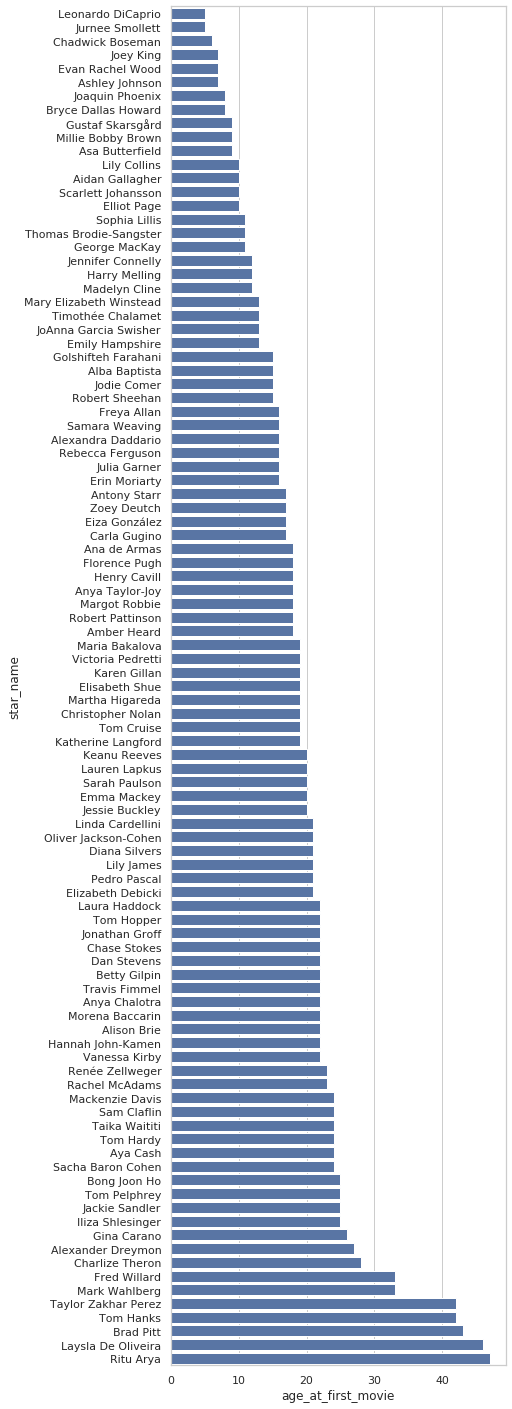

In [24]:
# Make a plot of the number of credits versus the name of actor/actress. 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
# initialize the figure
f, ax = plt.subplots(figsize=(6, 25))
sns.barplot(x='age_at_first_movie', y='star_name', data=age_frame, label='Age At First Movie', color='b')

In [25]:
 frame[frame.credits ==  frame.credits.max() ]

,star_name,gender,year_born,first_movie,year_first_movie,credits,age_at_first_movie
48,Fred Willard,1,1933,Pistols 'n' Petticoats,1966,312,33


In [26]:
 frame[frame.credits ==  frame.credits.min() ]

,star_name,gender,year_born,first_movie,year_first_movie,credits,age_at_first_movie
2,Anya Chalotra,0,1996,Wanderlust,2018,6,22
58,Emma Mackey,0,1996,Badger Lane,2016,6,20


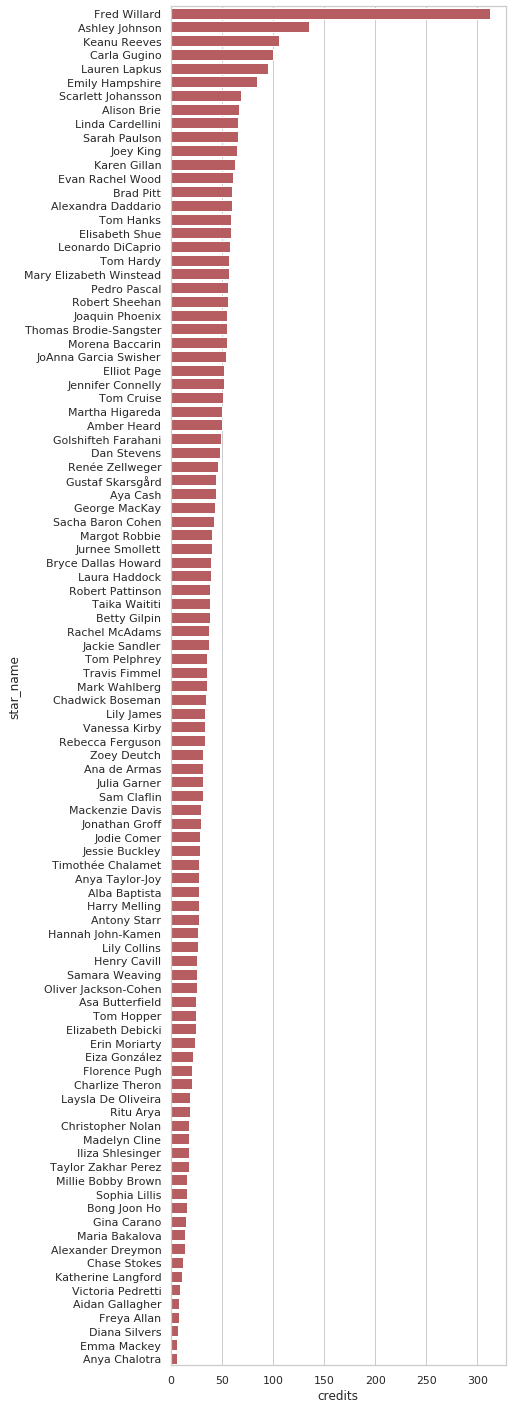

In [27]:
sns.set(style='whitegrid')
# initialize the figure
f, ax = plt.subplots(figsize=(6, 25))
frame_to_plot = frame.sort_values(by=['credits'], ascending=False)
sns.barplot(x='credits',y='star_name', data=frame_to_plot, label='Credits',  color='r')